# SC42150 - Python assignment 1

## Simulating a Stochastic Damped Harmonic Oscillator 

This is the template for for the first Python assignment given in the course SC42150. Use this template to answer the question.

# Team members

Name (student number): Danny Looman (4573269)

Name (student number): Bas van Vliet (4594959)

### How to use the template
As you will see there are two types of cells in this Jupyter Notebook, **Python** cells indicated with `In [ ]:` and **Markdown** cells that have no marking to the left of the cell.

1. The **Python** works in the usual way. Enter your code and press `Shift Enter` to run the cell. The output will be displayed below the cell. Variables and functions will be accessible by the other cells after you have run the code. 

2. The **Markdown** cells use the Markdown type setting language. This is a very simple type setting system. Check the [Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) for a overview of the commends. Furthermore, **Markdown** works with **LaTeX** math, `$ $` for inline equations and `$$ $$` for centered equations. press `Shift Enter` to compile the text.

After you have answered the questions and are finished with the assignment you can export the **Jupyter Notebook** as a PDF. Go to the top left, click on `File` then `Download As` and Choose **PDF**. If this feature is not supported by your system, you can also choose **LaTeX**. Then you Download a **LaTeX** project. You can then use your preferred **LaTeX** compiler to create the **PDF**. After generation you PDF report, please double check if all answers/plots are correctly displayed.

More information about Jupyter Notebooks can be easily found online.

### Useful python packages

In [2]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

## Question 1
If the random process $x(k)$ is wide-sense stationary (WSS), what can you say about its mean and variance? And what if the process is not WSS? **1 point**

provide: 
* *an answer with explanation*

### Answer 1
The mean of random process $x(k)$ does not change over time and is finite: $$m_x(k) = m_x < \infty$$

The variance of random process $x(k)$ do not change over time as stated in remark 5.7 of the lecture notes.
$$var_x=r_x(0)-m_x^2$$

If the process is not WSS we cannot assume constant mean and variance, the process can still be first order stationary (has a constant mean).

## Question 2
Approximate the derivative operator $\frac{d(\cdot)}{d t}$ and the second order derivative operator $\frac{d^2(\cdot)}{d t^2}$.  Subsequently replace the white noise signal $w(t)$ by a discrete white noise sequence as out lined in the theory section. Let $x(k)$ be an approximation of $x(t)$ for $t = k \Delta t$, then we ask you to write your result into the following second order difference equation form

$$ x(k)+ b_1 x(k-1) + b_2 x(k-2) = b_3 \tilde{w}(k).$$

Provide:

* *derivation for the second order difference equation* **2 points**
* *analytic expression for $b_1$, $b_2$, and $b_3$* **1 point**
* *numerical values for $b_1$, $b_2$, and $b_3$* **1 point**


### Answer 2
(1) The derivation of the coefficients:

We make use of the following three approximation during the derivation of the coefficients.

$$ v(t) = \frac{dx(t)}{dt}\approx \frac{x(k) - x(k-1)}{\Delta t}$$

$$ \frac{dv(t)}{dt} = \frac{dx(t)^2}{dt^2}\approx \frac{v(k) - v(k-1)}{\Delta t} = \frac{x(k) - 2x(k-1) + x(k-2)}{\Delta t^2} $$

$$ w(t) \approx \frac{\tilde{w}(k)}{\sqrt{\Delta t}} $$

The continues time dynamical equation becomes:

$$ \frac{dv(t)}{dt} = -\omega^2 x(t)-\gamma v(t) +  \beta w(t) $$

$$ \frac{x(k) - 2x(k-1) + x(k-2)}{\Delta t^2} = - \omega^2x(t) - \frac{\gamma}{\Delta t}(x(k) - x(k-1)) + \frac{\beta}{\sqrt{\Delta t}}\tilde{w}(k) $$

$$ x(k) - 2x(k-1) + x(k-2) = - \omega^2\Delta t^2x(t) - \gamma \Delta t x(k) + \gamma\Delta t x(k-1) + \frac{\beta \Delta t^2}{\sqrt{\Delta t}}\tilde{w}(k) $$

$$ (1 + \gamma\Delta t + \omega^2\Delta t^2)x(k) + (-\gamma\Delta t - 2)x(k-1) + x(k-2) = \frac{\beta \Delta t^2}{\sqrt{\Delta t}}\tilde{w}(k) $$

$$ x(k) + \frac{-\gamma\Delta t - 2}{1 + \gamma\Delta t + \omega^2\Delta t^2}x(k-1) + \frac{1}{1 + \gamma\Delta t + \omega^2\Delta t^2}x(k-2) = \frac{\tilde{w}(k) \beta \Delta t \sqrt{\Delta t}}{ 1 + \gamma\Delta t + \omega^2\Delta t^2} $$

$$ x(k)+ b_1 x(k-1) + b_2 x(k-2) = b_3 \tilde{w}(k).$$

(2) an analytic expression for the coefficients bi for i = 1; 2; 3

$$ b_1 = \frac{-\gamma\Delta t - 2}{1 + \gamma\Delta t + \omega^2\Delta t^2} $$

$$ b_2 = \frac{1}{1 + \gamma\Delta t + \omega^2\Delta t^2} $$

$$ b_3 = \frac{\beta \Delta t \sqrt{\Delta t}}{1 + \gamma\Delta t + \omega^2\Delta t^2} $$

(3) their numerical values making use of the data given in Table 2.1.

In [3]:
#variables
N = 10**4
delta_t = 10**-3
omega = 3.0
gamma = 1.0
beta = 0.5
denominator = 1 + gamma * delta_t + omega**2 * delta_t**2

b1 = (-gamma * delta_t - 2) / denominator
b2 = 1 / denominator
b3 = beta*delta_t*math.sqrt(delta_t) / denominator
print(f"b1 = {b1}, b2 = {b2}, b3 = {b3}")

b1 = -1.9989830261266386, b2 = 0.9989920170547919, b3 = 1.5795450691094586e-05


## Question 3

Determine the Z-transform of the dynamical system described by the difference equation from the previous question. Also determine the poles, both analytically and numerically. Is this system (BIBO) stable?

Provide:

* *The Z-transform of the dynamical system.* **$\frac{1}{2}$ point**
* *The poles analytically.* **$\frac{1}{2}$ point**
* *The poles numerically.* **$\frac{1}{2}$ point**
* *Is the system is BIBO stable? (explain why)* **$\frac{1}{2}$ point**

### Answer 3
The difference model is in AR from, therefore the Z-transform of the dynamical system can be found using equation 6.11 from the lecture notes.

$H(z) = \frac{b_3}{1 + b_1z^{-1} + b_2z^{-2}}$

- The poles analytically

Set the denominator equal to zero:
$1 + b_1z^{-1} + b_2z^{-2}=0$

Multiply both sides of the equation times $z^2 \rightarrow$   $z^2 + b_1z + b_2 = 0$


$ z_{1,2} = \frac{-b_1 \pm \sqrt{b_1^2 -4b_2}} {2}$

- See the code for the numerical values of the poles


#### is the system BIBO stable?
Since the transfer function is an AR model which is causal, all the poles must be inside the unit circle.
This means that the magnitude of the poles must be smaller than 1.


As can be seen in the code below, the magnitude of the poles are: 0.9995 which is close but smaller than 1.
Hence, the system is BIBO stable.

In [4]:
#compute the poles numerically
z1 = (-b1 + cmath.sqrt(b1**2 -4*b2)) / 2
z2 = (-b1 - cmath.sqrt(b1**2 -4*b2)) / 2
print(f"pole1 = {z1}, pole2 = {z2}")
print(f"Absolute value of pole1: {abs(z1)}")

pole1 = (0.9994915130633193+0.0029550582377551177j), pole2 = (0.9994915130633193-0.0029550582377551177j)
Absolute value of pole1: 0.9994958814596446


## Question 4

Simulate the difference equation of question 2 for $k = 3,\cdots ,N$ using the initial conditions $x(1) = x(2) = 0$. To do this you should generate discrete white noise samples using `numpy.random.randn()`.

Provide:

* *the script used to generate $N$ samples of $x(k)$.* **1 point**
* *a plot of one realization of sequence $x(k)$.* **1 point**

### Answer 4
$$ x(k)+ b_1 x(k-1) + b_2 x(k-2) = b_3 \tilde{w}(k)$$

Rewrite to:

$$ x(k)  = b_3 \tilde{w}(k) - b_1 x(k-1) - b_2 x(k-2)$$

With initial conditions

x(1) = x(2) = 0

The simulation is done in the code below.

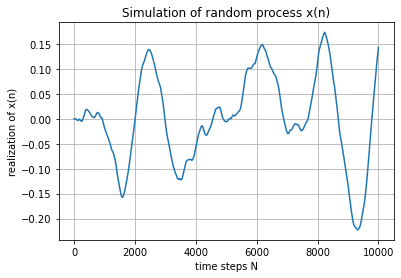

In [5]:
#initial conditions

x = np.zeros(N)
x[0] = 0
x[1] = 0
noise = np.random.randn(N)

for k in range(2,N):
    x[k]  = b3*noise[k] - b1*x[k-1] - b2*x[k-2]

N_vector = np.arange(0, N, 1)
fig = plt.figure(1)
ax = plt.subplot()
ax.plot(N_vector, x)
ax.set(xlabel='time steps N', ylabel='realization of x(n)',
       title='Simulation of random process x(n)')
ax.grid()
plt.show()

## Question 5

Let us denote one realization of the solution of the difference equation by $x(k,\lambda)$ for $\lambda = 1$ and the used white noise sequence by ˜ $w(k,1)$. Then the task is to generate $L$ realizations $x(k,\lambda)$ for $\lambda = 1,\cdots,L$, with each realization generated for a different realization of the discrete time white noise sequence ˜ $w(k,\lambda)$. 

provide:

* *script use to generate $L$ realizations of $x(k,\lambda)$.* **1 point**
* *plot of all $L$ realizations for $L = 30$.* **1 point**

### Answer 5

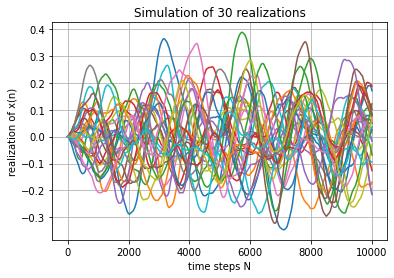

In [6]:
# make function because we need this again in Q8
def simulate_process(time_steps: int, realizations: int, initial_0=0, initial_1=0):
    _x = np.zeros((realizations, time_steps))
    _x[:,0] = initial_0
    _x[:,1] = initial_1

    # generate noise for each step
    _noise = np.random.randn(realizations, time_steps)

    for _k in range(2,time_steps):
        _x[:,_k]  = b3 * _noise[:,_k] - b1 * _x[:,_k-1] - b2 * _x[:,_k-2]

    return _x


l = 30 # Number of realizations
x = simulate_process(time_steps=N, realizations=l, initial_0=0, initial_1=0)

# plotting data
fig2 = plt.figure(2)
ax = plt.subplot()
for i in range(l):
    ax.plot(N_vector, x[i,:])
ax.set(xlabel='time steps N', ylabel='realization of x(n)',
       title='Simulation of 30 realizations')
ax.grid()
plt.show()

## Question 6

Using the L realizations of the previous questions, estimate the mean and variance of the stochastic process $x(k)$. Here, you can use the approximation 

$$E[x(k)] \sim \frac{1}{L} \sum^{L}_{\lambda = 1} x(k, \lambda)$$

and a similar approximation for the variance, or use the available built-in `numpy` commands. 

Provide:

* *A script to calculate the mean and variance.* **1 point**
* *A plot of the mean and the variance over time.* **1 point**


### Answer 6

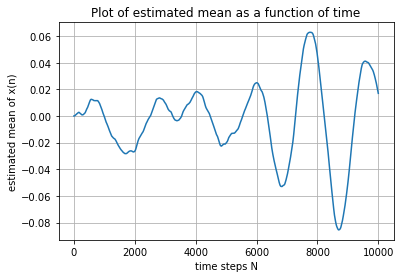

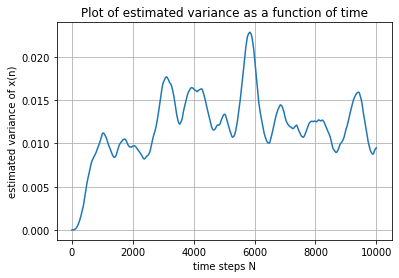

In [7]:
# make function of the expectation and variance because it is needed in Q8

def get_var_and_expectation(data):
    _N = np.size(data[1,:])
    _expectation = np.zeros(_N)
    _variance = np.zeros(_N)

    # note can also use the np.std and the np.mean functions
    for _k in range(_N):
        _expectation[_k] = sum(data[:,_k]) / len(data[:,_k])
        _variance[_k] = sum( (data[:,_k] - _expectation[_k])**2) / len(data[:,_k])

    return _expectation, _variance

expectation_x, variance_x = get_var_and_expectation(x)


# plot results
fig3 = plt.figure(3)
ax = plt.subplot()
ax.plot(N_vector, expectation_x)
ax.set(xlabel='time steps N', ylabel='estimated mean of x(n)',
       title='Plot of estimated mean as a function of time')
ax.grid()
plt.show()

fig4 = plt.figure(4)
ax = plt.subplot()
ax.plot(N_vector, variance_x)
ax.set(xlabel='time steps N', ylabel='estimated variance of x(n)',
       title='Plot of estimated variance as a function of time')
ax.grid()
plt.show()

## Question 7
Based on the results of the previous question, is the the stochastic process $x(k)$ WSS? Why or why not? **1 point**

### Answer 7
#### Definition
A WSS process has the following properties:
- (1) The mean must be constant over time and finite
- (2) The variance must be constant over time and finite
- (3) The auto-correlation must be independent of time

#### Observations
The following observations are made about the stochastic process $x(k)$:
- (1) The mean plot seems to show that the mean seems to vary around zero with a certain bound and seems to stay finite over N steps.
- (2) The variance plot seems to show an increasing line after which is stops growing and then varies with a certain bound around a constant value.
The variance also seems to stay finite over N steps.
- (3) The auto-correlation can be expressed as $r_x = c_x + m_x^2$.
 Since these both seem to have a certain bound, the auto-correlation does also seem to stay in a certain bound.

#### Discussion
The variation of the mean and the variance can be explained in the following ways:

The simulation calculates an estimation of the variance and the mean and not the true mean and variance.
Therefore, variation could occur and these estimators could differ from the true mean and variance.
The autocorrolation is a function of the mean and the variance. If these are constant, the auto-correlation is only dependent of the time difference.
This variation could be the result of a non-constant mean and variance, which would make the stochastic process not WSS.
However, more realizations should provide more clarity as the mean and variance could converge to a constant value, this would make the stochastic process WSS.

#### Conclusion
Taking the aforementioned points into account, we can not draw any conclusions about whether the stochastic process $x(k)$ is WSS. More data should provide clarity.

## Question 8

The mean and variance of the stochastic process $x(t)$ can also be calculated analytically. This leads to the following expressions,

$$ \mu_x (t) = e^{-\gamma t/2}\bigg( x_0 \cos(\omega' t) + \gamma x_0 \frac{\sin(\omega' t)}{2 \omega'} \bigg), $$

$$ \sigma^2_x (t) = \frac{\beta^2}{2\gamma \omega^2} + e^{-\gamma t} \bigg( \frac{\beta^2}{8\gamma \omega'^2 \omega^2} \bigg) \big(  -4\omega^2 + \gamma^2 \cos(\omega' t) - 2\gamma \omega' \sin(2 \omega' t)\big). $$

Here, $\omega'$ is another frequency parameter with the value $\omega' = \sqrt{\omega^2-\gamma^2/4}$, and $x_0$ is the value of $x$ at time $t = 0$(note that in this case this value greatly simplifies  the expression). Compare the theoretical mean and variance with the estimated ones from question $6$ for different values of $L$.

provide:

* *The script used to calculate the theoretical mean and variance.* **1 point**
* *A plot of both the theoretical mean and variance together with the estimated onces from question $6$ as a function of time. Plot all four sequences in one plot. make three plots one for $L = 30$, one for $L = 300$, and one for $L = 3000$.* **2 points**

### Answer 8
_Insert the cells with your answer below._

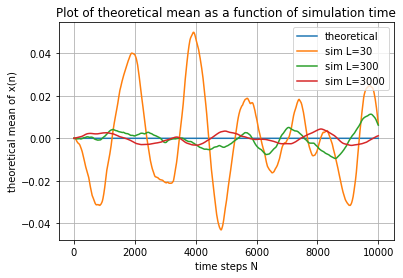

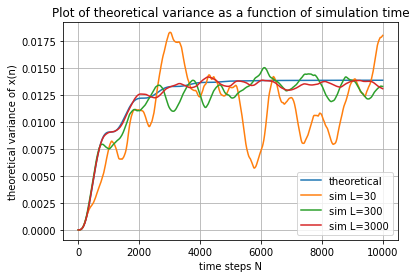

In [8]:
theo_mean = np.zeros(N)
theo_var = np.zeros(N)
omega_dash = math.sqrt(omega**2 - gamma**2/4)

# Remember that t = N*delta_t
t_start = 0
t_end = t_start + N*delta_t
t = np.arange(t_start, t_end, delta_t)

# calculate the theoretical mean and variance
for k in range(N):
    theo_mean[k] = math.exp(-gamma*t[k]/2)*(t_start*math.cos(omega_dash*t[k]) + gamma*t_start*math.sin(omega_dash*t[k])/(2*omega_dash))
    theo_var[k] = beta**2/(2*gamma*omega**2) + math.exp(-gamma*t[k]) * (beta**2/(8*gamma*omega_dash**2*omega**2)) * (-4*omega**2+gamma**2*math.cos(2*omega_dash*t[k]) - 2*gamma*omega_dash*math.sin(2*omega_dash*t[k]))

# simulate for L=30, L = 300 and L = 3000
exp_30, var_30 = get_var_and_expectation(simulate_process(N, 30, 0, 0))
exp_300, var_300 = get_var_and_expectation(simulate_process(N, 300, 0, 0))
exp_3000, var_3000 = get_var_and_expectation(simulate_process(N, 3000, 0, 0))

# plot mean
fig = plt.figure(5)
ax = plt.subplot()
ax.plot(N_vector, theo_mean), ax.plot(N_vector, exp_30), ax.plot(N_vector, exp_300), ax.plot(N_vector, exp_3000)
ax.set(xlabel='time steps N', ylabel='theoretical mean of x(n)',
       title='Plot of theoretical mean as a function of simulation time')
ax.grid()
ax.legend(("theoretical","sim L=30","sim L=300","sim L=3000"))
plt.show()

# plot var
fig6 = plt.figure(6)
ax = plt.subplot()
ax.plot(N_vector, theo_var), ax.plot(N_vector, var_30), ax.plot(N_vector, var_300), ax.plot(N_vector, var_3000)
ax.set(xlabel='time steps N', ylabel='theoretical variance of x(n)',
       title='Plot of theoretical variance as a function of simulation time')
ax.grid()
ax.legend(("theoretical","sim L=30","sim L=300","sim L=3000"))
plt.show()

## Question  9
How do the estimations of the mean and variance vary with respect to the number of realizations $L$? **1 point**

### Answer 9
In the graps of Q8 can be seen that when the numbers of realizations is increased, the amplitude of the variations is decreased and the estimations of the mean and variance seems to approaches the constant theoretical value.

## Question 10

Use the results from questions 6-9 and from question 3 to make a final conclusion on whether the stochastic process $x(k)$ is WSS or not, with motivation. **2 points**


### Answer 10
According to theorem 6.1 from the lecture notes the output of an LTI system is WSS if:
1. The input is WSS.
2. The LTI system given by the transfer function $H(z)$ is BIBO stable.

In our case the input to the system is ZMWN which is WSS according to definition 6.6 of the lecture notes.
And in Q3 of this assignment we showed the system is BIBO stable. Thus the output of the stochastic process $x(k)$ is WSS according to the theory.

This is motivated as well with the results from questions 6-9, according to definition 5.6 a random process is WSS which if it satisfied the following three criteria:
- The mean should be constant and finite: The simulations show that $m_x(k)$ converges to the theoretical (constant value).
- The variance is finite: The simulations of the variance quickly converges to a finite and constant value.
- The auto-correlation only depends on the lag: Since $r_x = c_x + m_x^2$ and the variance and the mean are constant, the auto-correlation does not depend on the chosen time points but only on the time difference.

Therefore our final conclusion is, backed by the theory and the simulations, that stochastic process $x(k)$ is WSS.